In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import plotnine as p9

In [14]:
all_week_data = []
for week_filename in os.listdir('updated_yt_data'):
    week_data = pd.read_csv(os.path.join('updated_yt_data', week_filename))
    all_week_data.append(week_data)

In [15]:
all_week_data = pd.concat(all_week_data)
all_week_data['publishedAt'] = pd.to_datetime(all_week_data['publishedAt'])
all_week_data['codingWeekStartDay'] = pd.to_datetime([week[:len('2019-12-01')+1] for week in all_week_data['codingWeek']])
all_week_data = all_week_data[all_week_data['codingWeekStartDay'] >= pd.to_datetime('2019-12-29')]
all_week_data.to_csv('all_week_data.csv')


At this point I realized that there were outliers caused by multi-day livestreams, so I did some manual cleaning here to get rid of what appeared to be large outliers caused by multi-day livestreams.

In [35]:
all_week_data = pd.read_csv('all_week_data_nolive.csv')
all_week_data['publishedAt'] = pd.to_datetime(all_week_data['publishedAt'])
all_week_data['codingWeekStartDay'] = pd.to_datetime(all_week_data['codingWeekStartDay'])

As of December 7, 2021, the Kurgesagt video that had the most views is actually 6th for total view counts, the highest view count goes to "COVID-19 Animation: What Happens If You Get Coronavirus?"

In [36]:
all_week_data.nlargest(7, 'viewCount')[['title', 'viewCount', 'publishedAt', 'videoURL']]

,title,viewCount,publishedAt,videoURL
273,COVID-19 Animation: What Happens If You Get Co...,114821137.0,2020-03-28 13:21:41+00:00,https://www.youtube.com/watch?v=5DGwOJXSxqg
183,Coronavirus kii Inside Story! | Vardaat with S...,58349042.0,2020-03-07 05:39:07+00:00,https://www.youtube.com/watch?v=JJsqVMRSW-8
1963,Wear a mask to stay protected during COVID-19,54221651.0,2021-05-03 10:01:00+00:00,https://www.youtube.com/watch?v=BqAKBXvppfw
2763,#YukPahami Lokasi Vaksinasi COVID-19,50315017.0,2021-11-12 10:56:09+00:00,https://www.youtube.com/watch?v=nUMwM0EB424
1113,WATCH LIVE: ABC News Channel for the latest hi...,49192081.0,2020-10-12 04:38:00+00:00,https://www.youtube.com/watch?v=W1ilCy6XrmI
243,The Coronavirus Explained &amp; What You Shoul...,36574338.0,2020-03-19 15:37:18+00:00,https://www.youtube.com/watch?v=BtN-goy9VOY
303,Viet Nam Se Chien Thang| MV Co Vu Chong Covid-...,32162110.0,2020-03-31 12:00:14+00:00,https://www.youtube.com/watch?v=OSFfph_1k0g


The total weekly view count patterns look similar for before Aug 2020. There seems to be peaks of renewed interest, but nothing like the early pandemic.

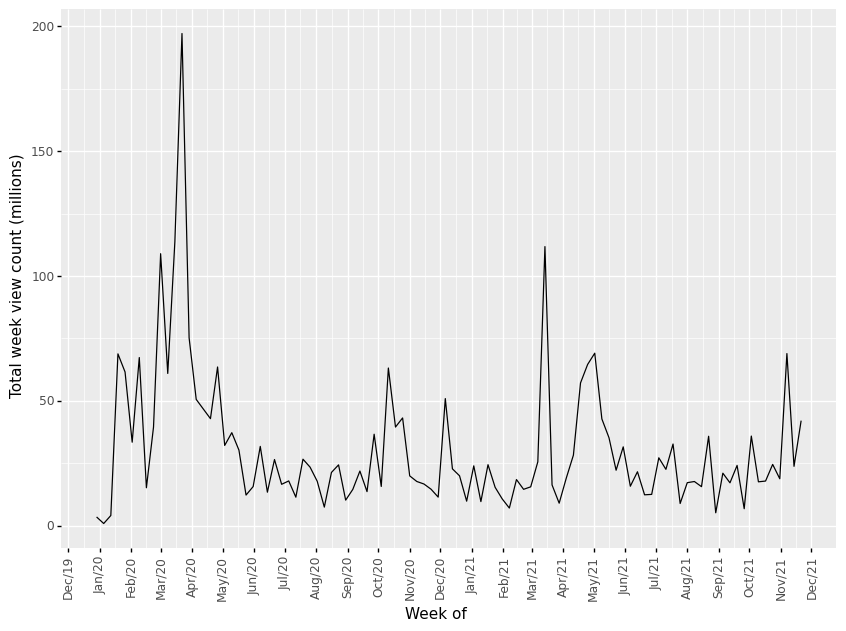

<ggplot: (150218557425)>

In [83]:
best_20_by_week = pd.DataFrame(all_week_data.groupby('codingWeekStartDay')['viewCount'].nlargest(20)).reset_index(level=[0, 1])
best_20_by_week = best_20_by_week.drop(columns='level_1')

viewcount_totals = best_20_by_week.groupby('codingWeekStartDay').sum()/1000000
viewcount_totals = viewcount_totals.reset_index(drop=False)

p9.ggplot(viewcount_totals) \
    + p9.aes(x='codingWeekStartDay', y='viewCount') \
    + p9.geom_line() \
    + p9.labs(x='Week of', y='Total week view count (millions)') \
    + p9.theme(axis_text_x=p9.element_text(angle=90), figure_size=(10, 7)) \
    + p9.scale_x_date(date_breaks='1 month', date_labels = '%b/%y')

